In [63]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import cm
from scipy import ndimage
from scipy.ndimage import convolve

In [109]:
img = cv2.imread('../person.jpg')

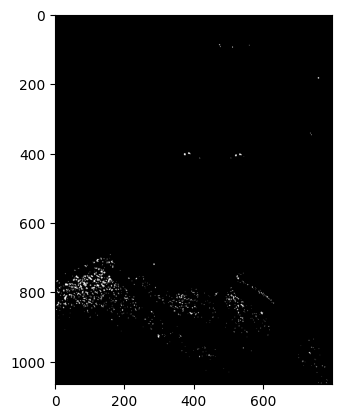

In [108]:
def harris_corner_detector(img,k=0.08,alpha=0.23,sigma=1,binarized = True):
    img_gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

    dx = cv2.Sobel(img_gray, cv2.CV_32F, 1, 0, ksize=3)
    dy = cv2.Sobel(img_gray, cv2.CV_32F, 0, 1, ksize=3)

    dx_2 = dx**2
    dy_2 = dy**2
    dxy = dx*dy

    sx_2 = ndimage.gaussian_filter(dx_2,sigma,mode='constant', cval=0.0)
    sy_2 = ndimage.gaussian_filter(dy_2,sigma,mode='constant', cval=0.0)
    sxy = ndimage.gaussian_filter(dxy,sigma,mode='constant', cval=0.0)

    det_M = sx_2*sy_2 - sxy**2
    trace_M = sx_2 + sy_2

    R = det_M - k*trace_M**2
    R = (R - np.min(R)) / (np.max(R) - np.min(R))
    if binarized:
        R[R > alpha] = 1
        R[R <= alpha] = 0
    return R

plt.imshow(harris_corner_detector(img,alpha=0.26),cmap=cm.gray)

    